## A notebook specifically for looking at the fitting FOM vs the true FOM

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
# import stuff
import sys,os,os.path

sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers

import core.functions as func
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.special as special
from scipy.stats import skewnorm
from scipy.optimize import curve_fit

from scipy.integrate import quad

In [3]:
folder_paths = ['75_9e-3/PORT_1a/isaura/', '75_9e-3/PORT_1b/isaura/', '75_9e-3/PORT_2a/isaura/', '75_9e-3/PORT_2b/isaura/']
full_tracks = func.collate_ports(folder_paths)

# apply cuts, SATELLITE TRACKS ARE DIFFERENT RN
#low_e_tracks = func.remove_low_E_events(full_tracks)
low_e_tracks = full_tracks[full_tracks.energy > 0.05]
# count the number of events identified with unique event, and change numb_of_tracks to reflect this
event_counts = low_e_tracks['event'].value_counts(sort = False)

# apply this to numb_of_tracks
low_e_tracks['numb_of_tracks'] = low_e_tracks['event'].map(event_counts)

cut_tracks = func.apply_cuts(low_e_tracks, lower_z = 20, upper_z = 1170, r_lim = 415)

Porting 75_9e-3/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 87009
Porting 75_9e-3/PORT_1b/isaura/
50
100
150
200
250
300
Tracks: 84703
Done! Tracks available: 152826
Porting 75_9e-3/PORT_2a/isaura/
50
100
150
200
250
300
Tracks: 60529
Done! Tracks available: 198973
Porting 75_9e-3/PORT_2b/isaura/
50
100
150
200
250
300
Tracks: 80864
Done! Tracks available: 259847


/tmp/ipykernel_6317/1665554878.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_e_tracks['numb_of_tracks'] = low_e_tracks['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 39.84 %
Absolute Cut efficiency:
Efficiency: 39.84 %
One track cut
Relative Cut efficiency:
Efficiency: 64.26 %
Absolute Cut efficiency:
Efficiency: 52.09 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 72.74 %
Absolute Cut efficiency:
Efficiency: 72.42 %
Energy cut
Relative Cut efficiency:
Efficiency: 10.60 %
Absolute Cut efficiency:
Efficiency: 7.88 %


In [4]:
# find positron events per port
pos_events = func.positron_ports(folder_paths)

Loading positrons from 75_9e-3/PORT_1a/isaura/
Port finished! Tracks available: 13282
Loading positrons from 75_9e-3/PORT_1b/isaura/
Positron events: 12865
Port finished! Tracks available: 25717
Loading positrons from 75_9e-3/PORT_2a/isaura/
Positron events: 9663
Port finished! Tracks available: 34976
Loading positrons from 75_9e-3/PORT_2b/isaura/
Positron events: 12817
Port finished! Tracks available: 47202


In [7]:
# apply cuts
low_e_tracks = full_tracks[full_tracks.energy > 0.05]
holder = func.apply_cuts(low_e_tracks, lower_z = 20, upper_z = 1170, r_lim = 415)
cut_tracks = holder[0]
efficiency = holder[1]

Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 39.84 %
Absolute Cut efficiency:
Efficiency: 39.84 %
One track cut
Relative Cut efficiency:
Efficiency: 64.26 %
Absolute Cut efficiency:
Efficiency: 52.09 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 72.74 %
Absolute Cut efficiency:
Efficiency: 72.42 %
Energy cut
Relative Cut efficiency:
Efficiency: 10.60 %
Absolute Cut efficiency:
Efficiency: 7.88 %


### Lets look at these tracks

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
0,5080000,0,1.068732,168.887195,64,9158,1,375.675,161.675,330.900281,...,384.212773,278.679478,445.580642,0.498749,0.045366,0.000000,12.200000,14.000,13.534216,1a
1,5080002,0,1.282228,248.187363,42,4241,4,-79.325,344.675,515.180105,...,94.850390,364.689594,517.833734,0.367780,0.074493,0.000000,14.444444,14.125,14.263647,1a
2,5080002,1,0.654868,69.761558,18,2150,4,-100.325,415.675,603.385913,...,-89.159408,425.914687,608.759268,0.384472,0.085811,0.000000,14.444444,14.125,14.263647,1a
3,5080002,2,0.147971,14.444444,2,457,4,133.675,360.675,499.470366,...,151.087271,367.376060,502.128486,0.147971,0.147971,0.147971,14.444444,14.125,14.263647,1a
4,5080002,3,0.023711,14.125000,2,79,4,30.675,411.675,618.959316,...,34.008329,416.683574,620.686133,0.023711,0.023711,0.023711,14.444444,14.125,14.263647,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199173,16242600,4,0.000163,0.000000,1,10,5,392.675,144.675,522.266030,...,394.191827,145.703739,522.266030,0.000163,0.000163,0.000163,13.727273,13.500,14.647876,2b
199174,16242608,0,0.323560,39.682723,9,3757,4,-90.325,149.675,144.115470,...,-69.244560,182.245223,153.247206,0.261957,0.131938,0.071007,14.619048,14.560,14.333215,2b
199175,16242608,1,0.067347,20.632745,4,1100,4,-16.325,192.675,236.099571,...,0.600238,211.473425,239.478202,0.066910,0.065414,0.064977,14.619048,14.560,14.333215,2b
199176,16242608,2,0.026308,14.619048,2,239,4,148.675,-127.325,229.572427,...,162.485191,-124.165896,229.572427,0.026308,0.026308,0.026308,14.619048,14.560,14.333215,2b


No limits applied


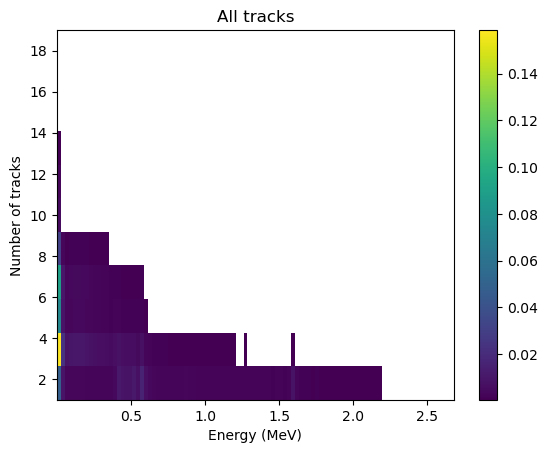

In [5]:
display(full_tracks)
func.energy_track_plots(full_tracks, "All tracks")

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
0,5080000,0,1.068732,168.887195,64,9158,1,375.675,161.675,330.900281,...,384.212773,278.679478,445.580642,0.498749,0.045366,0.000000,12.200000,14.000,13.534216,1a
1,5080002,0,1.282228,248.187363,42,4241,4,-79.325,344.675,515.180105,...,94.850390,364.689594,517.833734,0.367780,0.074493,0.000000,14.444444,14.125,14.263647,1a
2,5080002,1,0.654868,69.761558,18,2150,4,-100.325,415.675,603.385913,...,-89.159408,425.914687,608.759268,0.384472,0.085811,0.000000,14.444444,14.125,14.263647,1a
3,5080002,2,0.147971,14.444444,2,457,4,133.675,360.675,499.470366,...,151.087271,367.376060,502.128486,0.147971,0.147971,0.147971,14.444444,14.125,14.263647,1a
5,5080004,0,0.474589,33.623009,6,2938,3,15.675,-318.325,149.169202,...,23.303128,-289.613208,154.976143,0.363551,0.326402,0.215392,14.000000,13.750,11.455763,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199168,16242592,0,0.486158,55.746830,23,6839,1,-252.325,278.675,758.992828,...,-244.448303,320.485559,792.497945,0.237203,0.124090,0.000000,14.500000,12.600,14.403594,2b
199169,16242600,0,0.349277,33.420097,8,3130,5,341.675,74.675,510.118580,...,359.626572,79.036095,517.076058,0.309876,0.263734,0.225643,13.727273,13.500,14.647876,2b
199170,16242600,1,0.202911,51.646451,20,3289,5,244.675,95.675,941.743425,...,295.334827,133.827963,974.529748,0.167601,0.016636,0.000000,13.727273,13.500,14.647876,2b
199174,16242608,0,0.323560,39.682723,9,3757,4,-90.325,149.675,144.115470,...,-69.244560,182.245223,153.247206,0.261957,0.131938,0.071007,14.619048,14.560,14.333215,2b


No limits applied


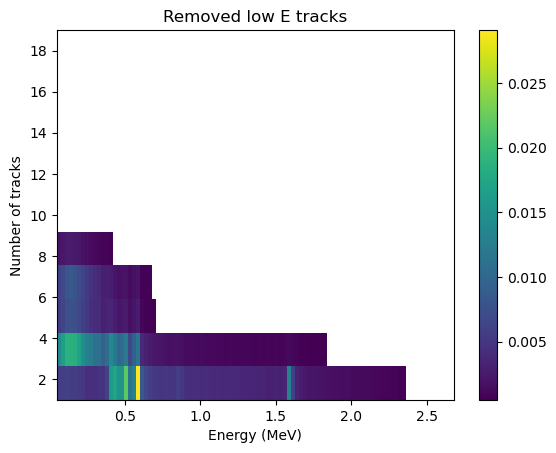

In [6]:
display(low_e_tracks)
func.energy_track_plots(low_e_tracks, "Removed low E tracks")

462054


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
107,5080086,0,1.683154,324.712905,75,7056,1,-240.325,-178.325,1037.969888,...,-217.390057,-41.463176,1044.619150,0.425738,0.077629,0.0,14.875000,14.500000,13.632267,1a
737,5080582,0,1.597251,142.007874,59,6551,1,296.675,-46.325,681.238031,...,337.279082,56.812115,714.750819,0.391053,0.238712,0.0,14.142857,14.500000,13.223831,1a
854,5080676,0,1.594962,141.841206,50,7768,1,179.675,146.675,453.319420,...,273.088557,157.066900,509.242530,0.625310,0.377647,0.0,14.428571,14.666667,13.097077,1a
984,1740022,0,1.595983,240.220791,71,7411,1,187.675,-35.325,409.113469,...,196.685108,54.418912,425.195124,0.514368,0.456328,0.0,13.800000,14.571429,13.871316,1a
1054,1740082,0,1.619501,331.972634,74,7845,1,-10.325,-338.325,191.247312,...,85.790312,-134.035423,305.482562,0.441276,0.031332,0.0,14.714286,14.133333,13.536416,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198842,16241272,0,1.574006,223.867158,72,7435,1,-281.325,-249.325,805.089797,...,-273.837107,-177.305044,807.944799,0.402007,0.106676,0.0,15.000000,13.000000,14.433241,2b
198971,16241752,0,1.572644,212.915386,60,7034,1,97.675,87.675,657.100763,...,187.201563,107.648847,764.446465,0.166567,0.099319,0.0,13.600000,13.600000,14.479188,2b
199018,16241920,0,1.658554,222.282927,62,7816,1,-184.325,112.675,354.851405,...,-73.664810,214.748726,480.480856,0.096633,0.045518,0.0,13.600000,14.500000,14.637642,2b
199116,16242384,0,1.594721,197.276892,62,8322,1,261.675,95.675,942.681994,...,269.941628,103.717442,1039.958627,0.345479,0.193620,0.0,13.714286,13.428571,14.756391,2b


,Cut,Relative Efficiency,Relative Events,Single Cut Efficiency
0,No cuts,100.000000,259830,100.000000
1,Fiducial Cuts,39.842589,103523,39.842589
2,One track cut,64.257218,66521,52.094446
3,Blob overlap cuts,72.737932,48386,72.418889
4,Energy cuts,10.604307,5131,7.880537


No limits applied


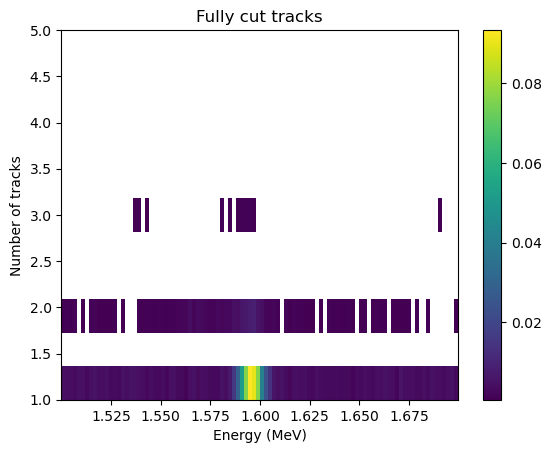

In [7]:
print(len(low_e_tracks.index))
display(cut_tracks)
display(efficiency)
func.energy_track_plots(cut_tracks, "Fully cut tracks")

sorry...what? how can you have fully cut tracks that have 3 tracks???

In [8]:
display(pos_events)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
302,5080008,42,e+,False,40,399.615417,394.366058,536.815430,0.004905,399.746094,...,0.780250,0.557767,1.590467,-0.0,-0.0,0.0,1.415293,1.324204,conv,annihil
1182,5080032,32,e+,False,30,-166.862320,-370.026581,1148.358154,3.770954,-198.535721,...,-0.247377,-0.461457,1.173200,0.0,0.0,-0.0,0.871628,187.018860,conv,annihil
1375,5080036,37,e+,False,35,-65.955795,324.198029,272.437469,1.781441,-22.099428,...,-1.258216,-0.110806,-0.581811,0.0,-0.0,0.0,0.970557,263.940033,conv,annihil
1757,5080048,18,e+,False,16,394.422913,407.527100,535.740845,0.035130,394.485077,...,0.217861,0.929769,-0.199142,0.0,-0.0,0.0,0.590233,0.248721,conv,annihil
1829,5080050,43,e+,False,41,466.010071,219.144073,487.874298,0.656721,466.172241,...,0.595691,-1.389832,-0.308319,0.0,0.0,0.0,1.114628,0.823723,conv,annihil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752264,16242256,34,e+,False,32,-114.562569,-91.601692,1087.404419,2.023086,-117.571022,...,0.160419,-0.097999,0.775439,-0.0,0.0,-0.0,0.436505,93.432091,conv,annihil
753503,16242376,83,e+,False,81,-427.247009,432.397552,917.598816,0.243769,-427.335297,...,-0.320067,1.025544,1.100725,0.0,-0.0,0.0,1.109772,0.913271,conv,annihil
753593,16242384,48,e+,False,46,260.313995,103.921936,1037.585571,2.464380,287.812988,...,1.415445,-0.343832,-0.223051,0.0,-0.0,-0.0,1.048673,298.150482,conv,annihil
754301,16242448,36,e+,False,34,-309.120483,-389.249420,262.833466,3.320535,-306.731415,...,0.609988,-1.262524,-1.162253,0.0,0.0,-0.0,1.380562,6.538743,conv,annihil


In [8]:
# collect positron events and non-positron events
ecut_positron_df = cut_tracks[cut_tracks['event'].isin(pos_events['event_id'].to_numpy())]
ecut_no_positron_df = cut_tracks[~cut_tracks['event'].isin(pos_events['event_id'].to_numpy())]

In [9]:
display(ecut_positron_df)
display(ecut_no_positron_df)
print("Total events: {}\nTotal events by addition of positron and non positron events: {}".format(len(cut_tracks.index), len(ecut_positron_df.index)+len(ecut_no_positron_df.index)))

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
737,5080582,0,1.597251,142.007874,59,6551,1,296.675,-46.325,681.238031,...,337.279082,56.812115,714.750819,0.391053,0.238712,0.0,14.142857,14.500000,13.223831,1a
854,5080676,0,1.594962,141.841206,50,7768,1,179.675,146.675,453.319420,...,273.088557,157.066900,509.242530,0.625310,0.377647,0.0,14.428571,14.666667,13.097077,1a
984,1740022,0,1.595983,240.220791,71,7411,1,187.675,-35.325,409.113469,...,196.685108,54.418912,425.195124,0.514368,0.456328,0.0,13.800000,14.571429,13.871316,1a
1300,1740272,0,1.585759,96.603199,52,7973,1,-188.325,53.675,411.501398,...,-118.512245,62.872010,445.278366,0.451501,0.414708,0.0,13.166667,12.833333,13.914674,1a
1637,1740538,0,1.601273,193.444398,49,7205,1,-103.325,-249.325,453.332480,...,-91.482329,-242.297144,508.823884,0.589608,0.299892,0.0,14.090909,14.000000,13.106973,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198479,19762392,0,1.604929,112.315378,60,7874,1,-285.325,-208.325,216.252848,...,-218.685085,-199.969816,228.420265,0.419387,0.171842,0.0,14.800000,13.000000,14.492734,2b
198507,19762528,0,1.596427,200.127789,60,7636,1,-339.325,153.675,747.247003,...,-280.646334,165.683304,769.544179,0.409495,0.375014,0.0,12.833333,13.857143,13.581706,2b
198518,19762584,0,1.588671,110.075779,53,6613,1,-45.325,138.675,1050.779363,...,40.908411,186.628330,1056.529790,0.375645,0.195780,0.0,13.285714,14.000000,12.484500,2b
198742,16240856,0,1.595266,296.177503,78,8110,1,-228.325,-123.325,998.487000,...,-216.860983,-114.148693,1021.188157,0.430058,0.315066,0.0,13.916667,13.777778,14.471986,2b


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
107,5080086,0,1.683154,324.712905,75,7056,1,-240.325,-178.325,1037.969888,...,-217.390057,-41.463176,1044.619150,0.425738,0.077629,0.0,14.875000,14.500000,13.632267,1a
1054,1740082,0,1.619501,331.972634,74,7845,1,-10.325,-338.325,191.247312,...,85.790312,-134.035423,305.482562,0.441276,0.031332,0.0,14.714286,14.133333,13.536416,1a
1826,3580030,0,1.684659,303.648446,74,7991,1,66.675,-39.325,140.929015,...,180.233645,62.355067,266.385098,0.630227,0.046992,0.0,15.000000,13.375000,14.067573,1a
2406,3580504,0,1.555068,208.235487,81,8245,1,171.675,-30.325,628.609997,...,178.731399,89.932348,789.685316,0.138299,0.038900,0.0,12.600000,14.333333,14.855233,1a
2962,1140230,0,1.586373,237.704869,59,7120,2,-384.325,47.675,811.325616,...,-284.962527,108.391757,889.954012,0.521848,0.042234,0.0,14.733333,14.277778,14.939852,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198611,16240336,0,1.558543,178.260521,55,8858,3,7.675,178.675,60.855966,...,77.717970,238.853393,155.215925,0.101707,0.086801,0.0,13.333333,13.888889,13.937159,2b
198842,16241272,0,1.574006,223.867158,72,7435,1,-281.325,-249.325,805.089797,...,-273.837107,-177.305044,807.944799,0.402007,0.106676,0.0,15.000000,13.000000,14.433241,2b
198971,16241752,0,1.572644,212.915386,60,7034,1,97.675,87.675,657.100763,...,187.201563,107.648847,764.446465,0.166567,0.099319,0.0,13.600000,13.600000,14.479188,2b
199018,16241920,0,1.658554,222.282927,62,7816,1,-184.325,112.675,354.851405,...,-73.664810,214.748726,480.480856,0.096633,0.045518,0.0,13.600000,14.500000,14.637642,2b


Total events: 5131
Total events by addition of positron and non positron events: 5131


### FOM fit and FOM true

Obtaining C1 and C2
C1: 0.3687058753369363, C2: 0.3684875826485875
mu: 1.5954988360875182, sigma: 0.004634927546085854
Applying cut 0.0 MeV


/home/e78368jw/anaconda3/envs/IC-3.8-2022-04-13/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Applying cut 0.01 MeV
Applying cut 0.02 MeV
Applying cut 0.03 MeV
Applying cut 0.04 MeV
Applying cut 0.05 MeV
Applying cut 0.06 MeV
Applying cut 0.07 MeV
Applying cut 0.08 MeV
Applying cut 0.09 MeV
Applying cut 0.1 MeV
Applying cut 0.11 MeV
Applying cut 0.12 MeV
Applying cut 0.13 MeV
Applying cut 0.14 MeV
Applying cut 0.15 MeV
Applying cut 0.16 MeV
Applying cut 0.17 MeV
Applying cut 0.18 MeV
Applying cut 0.19 MeV
Applying cut 0.2 MeV
Applying cut 0.21 MeV
Applying cut 0.22 MeV
Applying cut 0.23 MeV
Applying cut 0.24 MeV
Applying cut 0.25 MeV
Applying cut 0.26 MeV
Applying cut 0.27 MeV
Applying cut 0.28 MeV
Applying cut 0.29 MeV
Applying cut 0.3 MeV
Applying cut 0.31 MeV
Applying cut 0.32 MeV
Applying cut 0.33 MeV
Applying cut 0.34 MeV
Applying cut 0.35000000000000003 MeV
Applying cut 0.36 MeV
Applying cut 0.37 MeV
Applying cut 0.38 MeV
Applying cut 0.39 MeV
Applying cut 0.4 MeV
Applying cut 0.41000000000000003 MeV
Applying cut 0.42 MeV
Applying cut 0.43 MeV
Applying cut 0.44 MeV
Applyi

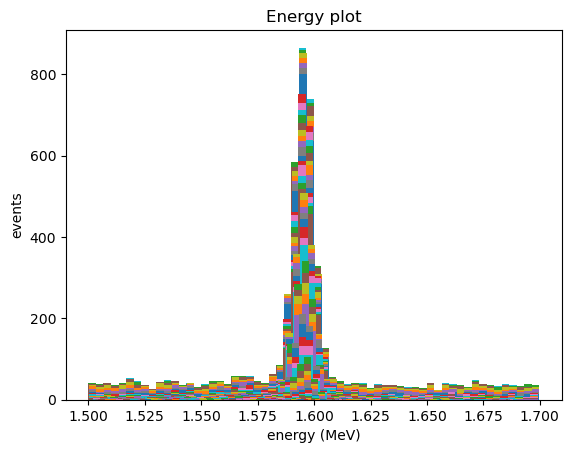

In [12]:
cut_list = np.linspace(0,0.6, 61)

# Fit
fom_out_fit = func.fom_calc_MC(cut_tracks, pos_events, cut_list, binning = 60)

In [12]:
print(fom_out_fit[0])

[6.748052660525266e-06, 6.748052660525266e-06, 6.797870350787178e-06, 6.951722497786379e-06, 7.2490070317055346e-06, 7.811276503491693e-06, 8.397808415658527e-06, 9.19315651406632e-06, 9.981990562109856e-06, 1.094036000779322e-05, 1.1700956935760838e-05, 1.2324004927794315e-05, 1.3130977438618497e-05, 1.4126259917142764e-05, 1.5128823264806627e-05, 1.5995865593721115e-05, 1.688469796180116e-05, 1.7616572421950818e-05, 1.754328407317646e-05, 1.7683138296556275e-05, 1.7886573621144038e-05, 1.8497051595020976e-05, 1.919282554702203e-05, 1.9450053708773416e-05, 1.98230828820003e-05, 2.0545631348988227e-05, 2.0447433589172154e-05, 2.0061250253275374e-05, 1.922655789803972e-05, 1.9629174592191725e-05, 1.8623763819498185e-05, 2.0606254816447825e-05, 2.653136958835511e-05, 2.5231714036350577e-05, 2.802185384322111e-05, 3.074871951343616e-05, 2.4311469322959332e-05, 1.6962473033638967e-05, 1.789934893375115e-05, 1.2693289031398093e-05, 1.1455347223458383e-05, 1.232997186769533e-05, 1.2309705941

In [13]:


fom = func.true_fom_calc(ecut_positron_df, ecut_no_positron_df, cut_list)

ns = fom[2]
nb = fom[3]
fom_erro = np.nan_to_num(fom[1])
fom_out_MC = np.nan_to_num(fom[0])



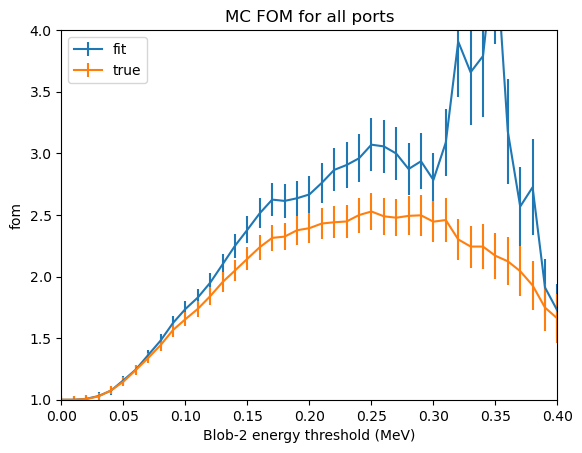

In [14]:
# plot
plt.errorbar(cut_list, fom_out_fit[0], yerr = fom_out_fit[1], label = 'fit')
plt.errorbar(cut_list, fom_out_MC, yerr = fom_erro, label = 'true')
plt.title("MC FOM for all ports")
plt.xlabel("Blob-2 energy threshold (MeV)")
plt.xlim([0,0.4])
plt.ylim([1,4])
plt.legend()

plt.ylabel("fom")
plt.show()

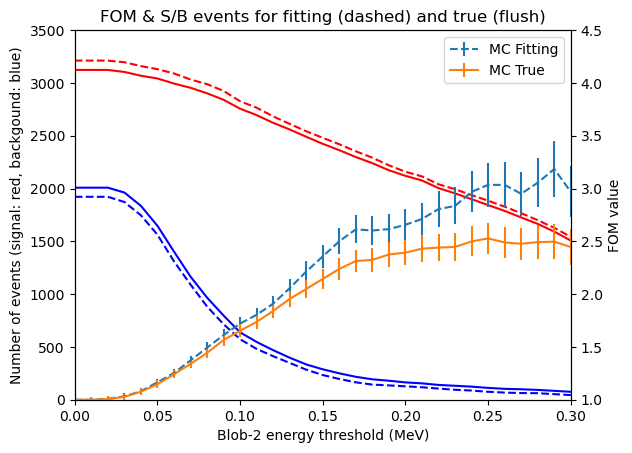

In [29]:
fig, ax1 = plt.subplots()

ax1.plot(cut_list, ns[:-1], label = "Signal events - MC TRUE", color = 'red')
ax1.plot(cut_list, nb[:-1], label = "Background events - MC TRUE", color = 'blue')
ax1.plot(cut_list, fom_out_fit[2][:-1], label = "Signal events - MC FIT", linestyle = 'dashed', color = 'red')
ax1.plot(cut_list, fom_out_fit[3][:-1], label = "Background events - MC FIT", linestyle = 'dashed', color = 'blue')
ax1.set_ylim([0,3500])
ax2 = ax1.twinx()

ax2.errorbar(cut_list, fom_out_fit[0], yerr = fom_out_fit[1],  label = "MC Fitting", linestyle = 'dashed')
ax2.errorbar(cut_list, fom_out_MC, yerr = fom_erro, label = "MC True")
ax2.set_ylim([1, 4.5])

plt.xlim([0, 0.3])
ax1.set_ylabel("Number of events (signal: red, backgound: blue)")
ax2.set_ylabel("FOM value")
ax1.set_xlabel("Blob-2 energy threshold (MeV)")
ax2.legend()
plt.title("FOM & S/B events for fitting (dashed) and true (flush)")
plt.show()

In [36]:
display(ecut_positron_df[ecut_positron_df.numb_of_tracks == 3])

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
2261,3580384,0,1.590258,194.161128,59,7069,3,-124.325,75.675,966.838950,...,-86.609860,211.191066,1049.030747,0.424933,0.053347,0.0,14.375000,14.833333,13.437178,1a
27735,5340530,0,1.594933,252.461071,57,6557,3,186.675,-167.325,1015.027453,...,196.427142,-155.679143,1045.910088,0.421484,0.363475,0.0,14.947368,15.000000,14.867823,1a
48701,5620438,0,1.587570,201.885059,48,7916,3,-127.325,287.675,141.921560,...,-117.478527,382.135953,178.445413,0.371191,0.329225,0.0,14.846154,14.857143,14.886549,1a
51352,3540632,0,1.594933,177.788878,55,7947,3,-0.325,189.675,175.410605,...,8.936560,203.861184,198.126689,0.389738,0.283228,0.0,14.000000,14.300000,13.945965,1a
95371,4540386,0,1.581449,117.104034,53,7527,3,121.675,300.675,816.519966,...,152.382161,348.234092,821.429181,0.340320,0.219843,0.0,13.875000,14.250000,13.418888,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174765,20242320,0,1.590542,212.335272,60,7123,3,-280.325,47.675,786.188681,...,-223.628034,135.913591,856.406699,0.410283,0.378695,0.0,15.000000,14.806452,14.772925,2b
176426,13121192,0,1.593323,205.591966,59,7686,3,-358.325,-60.325,111.144994,...,-334.449367,-54.832994,133.531413,0.337730,0.076343,0.0,14.981818,14.222222,14.887800,2b
179759,13520648,0,1.553184,137.338444,64,7868,3,-156.325,294.675,974.176809,...,-134.427147,350.280158,1081.144007,0.389294,0.329155,0.0,13.500000,14.888889,14.262454,2b
192052,15680432,0,1.595150,242.347899,71,7451,3,-372.325,78.675,801.061997,...,-361.099721,124.970051,810.165243,0.422767,0.399684,0.0,14.230769,14.904762,14.124693,2b


In [50]:
# Looking at the minutia. Lets take 0.15 MeV. Look at how many positron events exist within that cut, and how many background events do to. Then do an outright fit.
our_cut = 0.15 # MeV
ns0_MC = len(ecut_positron_df.index)
nb0_MC = len(ecut_no_positron_df.index)



lower_data_pos = ecut_positron_df[(ecut_positron_df['eblob2'] > our_cut)]
lower_data = ecut_no_positron_df[(ecut_no_positron_df['eblob2'] > our_cut)]


ns_MC = len(lower_data_pos.index)
nb_MC = len(lower_data.index)


e_MC = ns_MC/ns0_MC
b_MC = nb_MC/nb0_MC
fom_MC = e_MC/np.sqrt(b_MC)

print("ns0: {}\nnb0: {}".format(ns0_MC, nb0_MC))
print("{} MeV cut applied".format(our_cut))
print("ns: {}\nnb: {}".format(ns_MC, nb_MC))
print("e: {}\nb: {}\nFOM: {}".format(e_MC, b_MC, fom_MC))

ns0: 3123
nb0: 2008
0.15 MeV cut applied
ns: 2363
nb: 250
e: 0.7566442523214858
b: 0.12450199203187251
FOM: 2.144389081616347


now the fitting method

Obtaining C1 and C2
=========================== SIGNAL FIT ============================


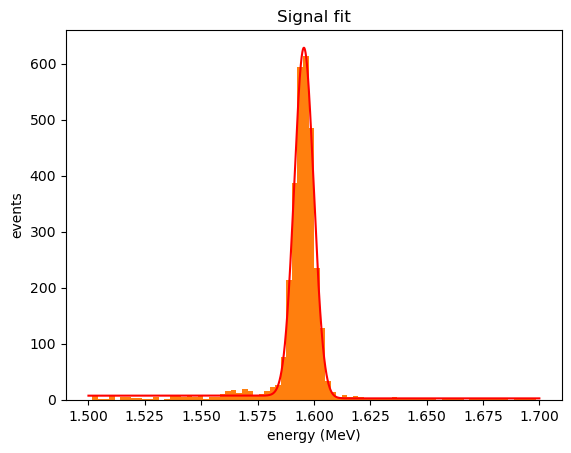

        Fitting output      
B1: 6.7534 ± 39.1096
A: 0.0057 ± 2343.9238
mu: 1.5956 ± 8.0789
sigma: 0.0043 ± 0.0370
C1: 0.3583 ± 2.0554
C2: 0.3543 ± 2.0793
C1: 0.3583438269980382, C2: 0.35433617808083
mu: 1.595520279733812, sigma: 0.004607638815220153


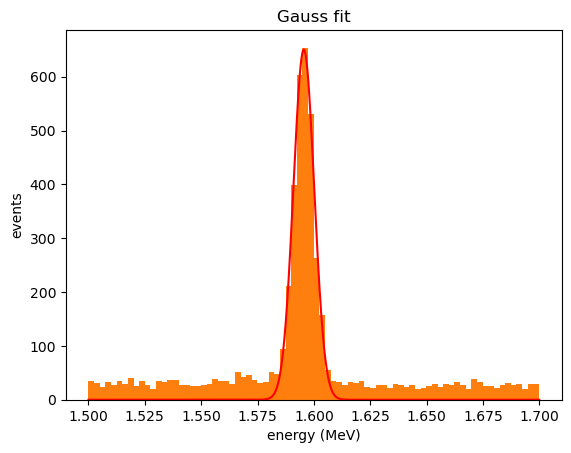

        Fitting output      
A: 650.5492 ± 20.3005
mu: 1.5955 ± 0.0002
sigma: 0.0046 ± 0.0002
=========================== FULL FIT ============================


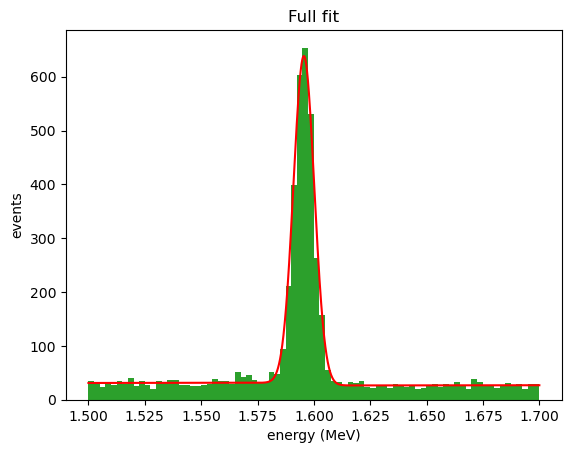

        Fitting output      
ns: 7.0406 ± 0.0652
a: 0.0082 ± 0.0157
nb: 18.1825 ± 23.0782
tau: -5.7684 ± 26.3446
ns0      = 3211.5658150192685
nb0      = 1921.4417649032705
total    = 5133
Event no = 5131
Applying cut 0.15 MeV
=========================== GAUSSIAN FIT ============================


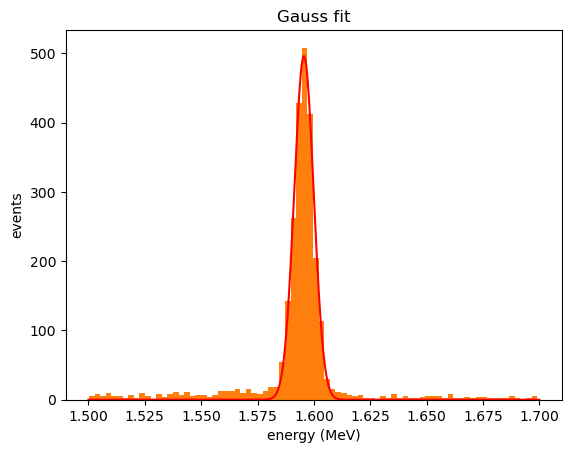

        Fitting output      
A: 495.8433 ± 6.0387
mu: 1.5956 ± 0.0001
sigma: 0.0043 ± 0.0001
ns0: 3211.5658150192685
nb0: 1921.4417649032705
0.15 MeV cut applied
ns: 2419.2030634977405
nb: 196.20299469592473
e: 0.7532783703774808
b: 0.10211238158748048
FOM: 2.3573078072824702


<Figure size 640x480 with 0 Axes>

In [67]:
sig_data = ecut_positron_df
bck_data = ecut_no_positron_df
cut_data = cut_tracks[0]
binning = 80

# preset some parameters for sanity purposes
emin = 1.5
emax = 1.7

print("Obtaining C1 and C2")
#####            C1 AND C2 ACQUISITION          #####
# p0 is apriori
p0 = ([1, 1, 1.58, 0.3, 0.8, 0])
fit_labels = ['B1', 'A', 'mu', 'sigma', 'C1', 'C2']

# fit the histogram
s_popt, s_pcov = func.histogram_fit(func.sig_func, sig_data, binning, p0, fit_labels)


# Set C1 and C2
C1 = s_popt[4]
C2 = s_popt[5]


# C1 and C2 control
if (C1 < 0):
    C1 = 0
if (C2 < 0):
    C2 = 0

print("=========================== SIGNAL FIT ============================")
func.plot_fit(func.sig_func, np.linspace(emin, emax, 1000), s_popt, fit_labels)
func.plot_hist(sig_data, binning = 80, title='Signal fit', log = False)
plt.show()
func.print_parameters(s_popt, s_pcov, fit_labels)


print("C1: {}, C2: {}".format(C1, C2))


# apriori
g_p0 = [500, 1.6, 0.01]
g_labels = ['A', 'mu', 'sigma']

g_popt, g_pcov = func.histogram_fit(func.gauss, cut_data, binning, g_p0, g_labels)
# set mu and sigma
mu      = g_popt[1]
sigma   = g_popt[2]

print("mu: {}, sigma: {}".format(mu, sigma))


func.plot_fit(func.gauss, np.linspace(emin, emax, 1000), g_popt, g_labels)
func.plot_hist(cut_data, binning = 80, title='Gauss fit', log = False)
plt.show()
func.print_parameters(g_popt, g_pcov, g_labels)


fixed_sig_bck_func = lambda x, ns, a, nb, tau: func.sig_bck_func(x, ns, a, mu, sigma, C1, C2, nb, tau)

# apriori
sb_p0 = [400, 1, 20, 0.1]
sb_labels = ['ns', 'a', 'nb', 'tau']

sb_popt, sb_pcov = func.histogram_fit(fixed_sig_bck_func, cut_data, binning, sb_p0, sb_labels)

_, edges, _ =func.plot_hist(cut_data, binning = binning, log = False, data = True)
bin_width = edges[1] - edges[0]
ns0 = quad(func.sig_func, emin, emax, args = (sb_popt[0],sb_popt[1], mu, sigma, C1, C2))/bin_width
nb0 = quad(func.bck_func, emin, emax, args = (sb_popt[2], sb_popt[3]))/bin_width

print("=========================== FULL FIT ============================")
func.plot_fit(fixed_sig_bck_func, np.linspace(emin, emax, 1000), sb_popt, sb_labels)
func.plot_hist(cut_data, binning = 80, title='Full fit', log = False)
plt.show()
func.print_parameters(sb_popt, sb_pcov, sb_labels)

print('ns0      = {}'.format(ns0[0]))
print('nb0      = {}'.format(nb0[0]))
print("total    = {:.0f}".format(ns0[0]+nb0[0]))
print("Event no = {}".format(len(cut_data.index)))


# wipe variables to stop variable bleed over
del g_popt, g_pcov, mu, sigma, sb_popt, sb_pcov, bin_width


print("Applying cut {} MeV".format(our_cut))
blob_data = cut_data[(cut_data['eblob2'] > our_cut)]


# collect gaussian peak
g_popt, g_pcov = func.histogram_fit(func.gauss, blob_data, binning, g_p0, g_labels)

# set mu and sigma
mu      = g_popt[1]
sigma   = g_popt[2]

print("=========================== GAUSSIAN FIT ============================")
func.plot_fit(func.gauss, np.linspace(emin, emax, 1000), g_popt, g_labels)
func.plot_hist(blob_data, binning = 80, title='Gauss fit', log = False)
plt.show()
func.print_parameters(g_popt, g_pcov, g_labels)


# collect nb and ns
sb_popt, sb_pcov = func.histogram_fit(fixed_sig_bck_func, blob_data, binning, sb_p0, sb_labels, bounds = ([0, -np.inf, 0, -np.inf],[np.inf, np.inf, np.inf, np.inf]))
# take bin widths to calculate number of events
_, edges, _ =func.plot_hist(blob_data, binning = binning, log = False, data = True, output = False)
bin_width = edges[1] - edges[0]

ns = quad(func.sig_func, emin, emax, args = (sb_popt[0],sb_popt[1], mu, sigma, C1, C2))/bin_width
nb = quad(func.bck_func, emin, emax, args = (sb_popt[2], sb_popt[3]))/bin_width

e_check = ns[0]/ns0[0]
b_check = nb[0]/nb0[0]
fom_check = e_check/np.sqrt(b_check)

plt.clf()

print("ns0: {}\nnb0: {}".format(ns0[0], nb0[0]))
print("{} MeV cut applied".format(our_cut))
print("ns: {}\nnb: {}".format(ns[0], nb[0]))
print("e: {}\nb: {}\nFOM: {}".format(e_check, b_check, fom_check))